In [1]:
import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

In [2]:
df=sm.datasets.fair.load_pandas().data

In [3]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


In [5]:
def affair_check(x):
    if x !=0:
        return 1
    else:
        return 0

In [6]:
df['hadaffairs']=df['affairs'].apply(affair_check)

In [7]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,hadaffairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   hadaffairs       6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [9]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,hadaffairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [10]:
df['affairs'].dtype

dtype('float64')

In [11]:
import seaborn as sns

<AxesSubplot:>

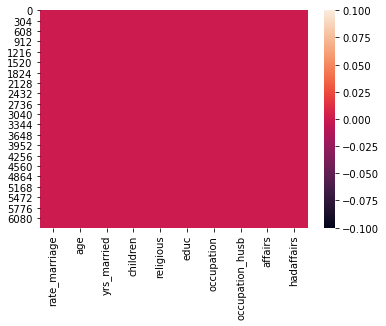

In [12]:
sns.heatmap(df.isnull())

<AxesSubplot:>

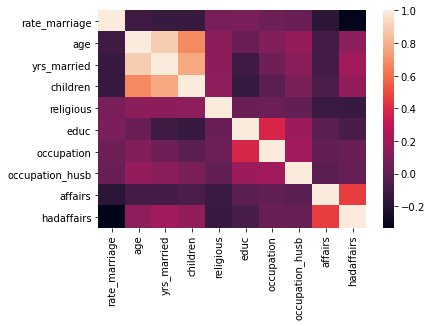

In [13]:
sns.heatmap(df.corr())

In [14]:
df['age'].count

<bound method Series.count of 0       32.0
1       27.0
2       22.0
3       37.0
4       27.0
        ... 
6361    32.0
6362    32.0
6363    22.0
6364    32.0
6365    22.0
Name: age, Length: 6366, dtype: float64>

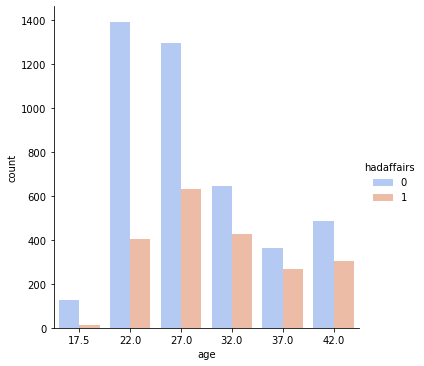

In [15]:
sns.catplot(x='age',hue='hadaffairs',data=df,palette='coolwarm',kind='count')

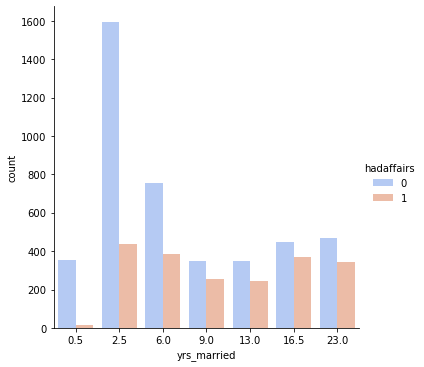

In [16]:
sns.catplot(x='yrs_married',hue='hadaffairs',data=df,palette='coolwarm',kind='count')

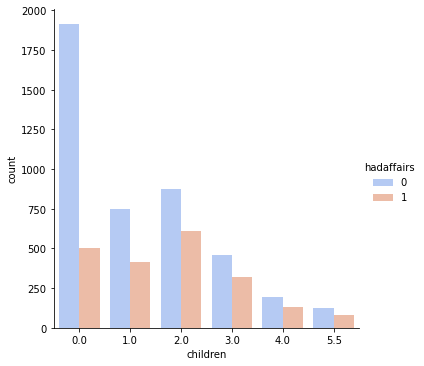

In [17]:
sns.catplot(x='children',hue='hadaffairs',data=df,palette='coolwarm',kind='count')

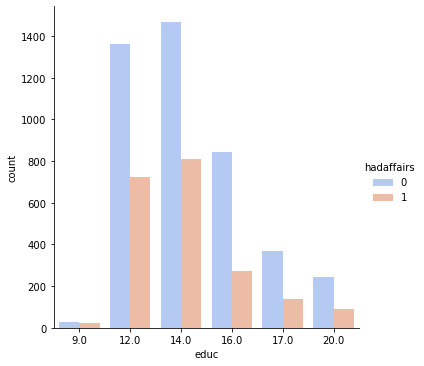

In [18]:
sns.catplot(x='educ',hue='hadaffairs',data=df,palette='coolwarm',kind='count')

In [19]:
occ_dummies=pd.get_dummies(df['occupation'])

In [20]:
hus_occ_dummies=pd.get_dummies(df['occupation_husb'])

In [21]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [22]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [23]:
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [24]:
X=df.drop(['occupation','occupation_husb','hadaffairs'],axis=1)

In [25]:
dummies=pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [26]:
X=pd.concat([X,dummies],axis=1)

In [27]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [28]:
Y=df.hadaffairs

In [29]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: hadaffairs, Length: 6366, dtype: int64

In [30]:
X=X.drop('occ1',axis=1)
X=X.drop('hocc1',axis=1)
X=X.drop('affairs',axis=1)

In [31]:
Y=np.ravel(Y)

In [32]:
log_model1=LogisticRegression()

In [33]:
log_model1.fit(X,Y)

C:\Users\chepp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
log_model1.score(X,Y)

0.7252591894439209

In [35]:
Y.mean()

0.3224945020420987

In [36]:
coeff_df=pd.DataFrame(zip(X.columns,np.transpose(log_model1.coef_)))

In [37]:
coeff_df

,0,1
0,rate_marriage,[-0.6689563229689033]
1,age,[-0.06025442312061723]
2,yrs_married,[0.10695652857398869]
3,children,[0.015317756543493353]
4,religious,[-0.3430058817163857]
5,educ,[0.030078606942314578]
6,occ2,[0.25364490391926936]
7,occ3,[0.6354455145451507]
8,occ4,[0.305684673516181]
9,occ5,[0.8560905582331937]


In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [39]:
print(X_train.shape)
print(X_test.shape)

(4456, 16)
(1910, 16)


In [40]:
log_model2=LogisticRegression()

In [41]:
log_model2.fit(X_train,Y_train)

C:\Users\chepp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
class_predict=log_model2.predict(X_test)

In [43]:
class_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix

In [45]:
print(f'Classification report : {classification_report(Y_test,class_predict)}')

Classification report :               precision    recall  f1-score   support

           0       0.73      0.91      0.81      1286
           1       0.63      0.32      0.42       624

    accuracy                           0.72      1910
   macro avg       0.68      0.61      0.62      1910
weighted avg       0.70      0.72      0.69      1910



In [46]:
print(f'Accuracy Score : {accuracy_score(Y_test,class_predict)}')
print(f'Roc_Auc_Score : {roc_auc_score(Y_test,class_predict)}')
print(f'Confusion Matrix : {confusion_matrix(Y_test,class_predict)}')

Accuracy Score : 0.7167539267015707
Roc_Auc_Score : 0.6139415599952147
Confusion Matrix : [[1171  115]
 [ 426  198]]


In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
scores

C:\Users\chepp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chepp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.72056515, 0.69387755, 0.73783359, 0.70643642, 0.70957614,
       0.7299843 , 0.73113208, 0.70754717, 0.75      , 0.75471698])

In [48]:
scores.mean()

0.7241669381831106